The following code is a desparate attempt from a noob player trying to get better at the famous Newyork Times game "WORDLE". As of now, in this file, I'll be only analysing the words and the letters they are made up of.  
Basically, we will be doing the following.  
1)The frequency distribution analysis of the letter.  
2)We will then take the top 10 and then top 15 letters among them, and try to do something with them so as to get the best 2 seed and 3 seed words.  
3) It should be further noted that its not just the frequency of the letters, but also there positions that matter to us, but we will look at that later.


In [5]:
from collections import Counter
import matplotlib.pyplot as plt

In [7]:
with open('/content/5 letter words.txt', 'r') as f:
    text = f.read()

In [8]:
words = text.split()

In [9]:
all_letters = ''.join(words)

In [10]:
letter_freq = Counter(all_letters)
sorted_freq = sorted(letter_freq.items(), key=lambda x: x[1], reverse=True)

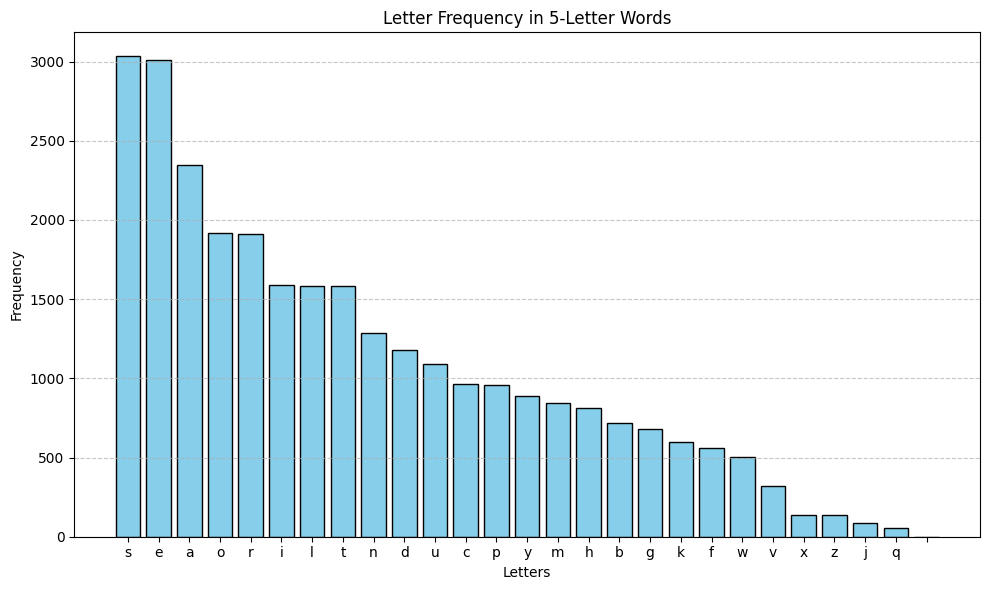

In [11]:
letters, freqs = zip(*sorted_freq)

plt.figure(figsize=(10, 6))
plt.bar(letters, freqs, color='skyblue', edgecolor='black')
plt.title('Letter Frequency in 5-Letter Words')
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

So we can see that the best 10 letters for us are the following  
=>S, E, A, O, R, I, L, T, N, D.  
So the best 2 seed strategy and the words should be the following ***according to the current analysis*** are the following:  
1)TONES, LAIRD  
2)STAND, OILER  
The next 5 letters in the line are the following  
U,C,P,Y,M.  
Therefore the proposed 3 seed word combo is the following:  
1)MAYOR, CLIPS, TUNED  
2)PLUME, CANDY, RIOTS  
Now to enhance our guesses, we will look at the heatmap distribution of the letters at specfic position, and try to find out any correlation or anything which can improve our strategy which is currently ***just based on the frequency distribition of the letters.***

In [12]:
#we will first generate a heat map, and lets see what happens
import seaborn as sns
import numpy as np
import string

In [16]:
heatmap_data = np.zeros((5, 26), dtype=int)
letters = string.ascii_lowercase #Explaination of this line:
words = [word for word in words if len(word) == 5]

In [24]:
for word in words:
    for i, letter in enumerate(word):
        if letter in letters:
            heatmap_data[i, letters.index(letter)] += 1

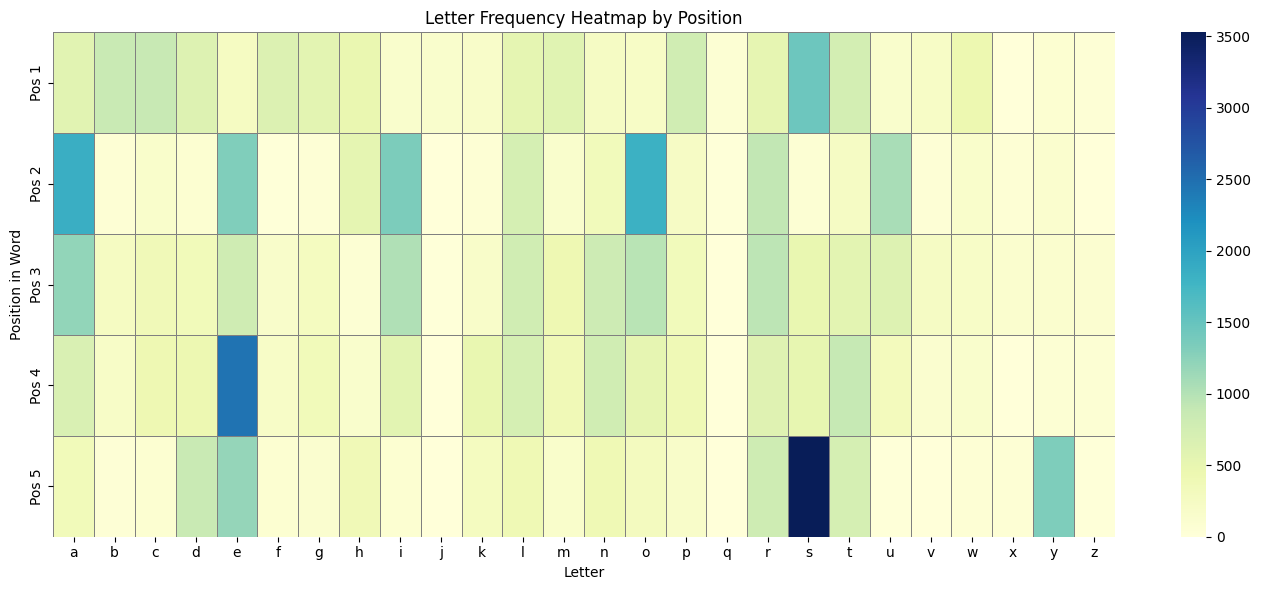

In [25]:
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data,
            xticklabels=list(letters),
            yticklabels=['Pos 1', 'Pos 2', 'Pos 3', 'Pos 4', 'Pos 5'],
            cmap='YlGnBu',
            linewidths=0.5,
            linecolor='gray',
            annot=False)

plt.title('Letter Frequency Heatmap by Position')
plt.xlabel('Letter')
plt.ylabel('Position in Word')
plt.tight_layout()
plt.show()

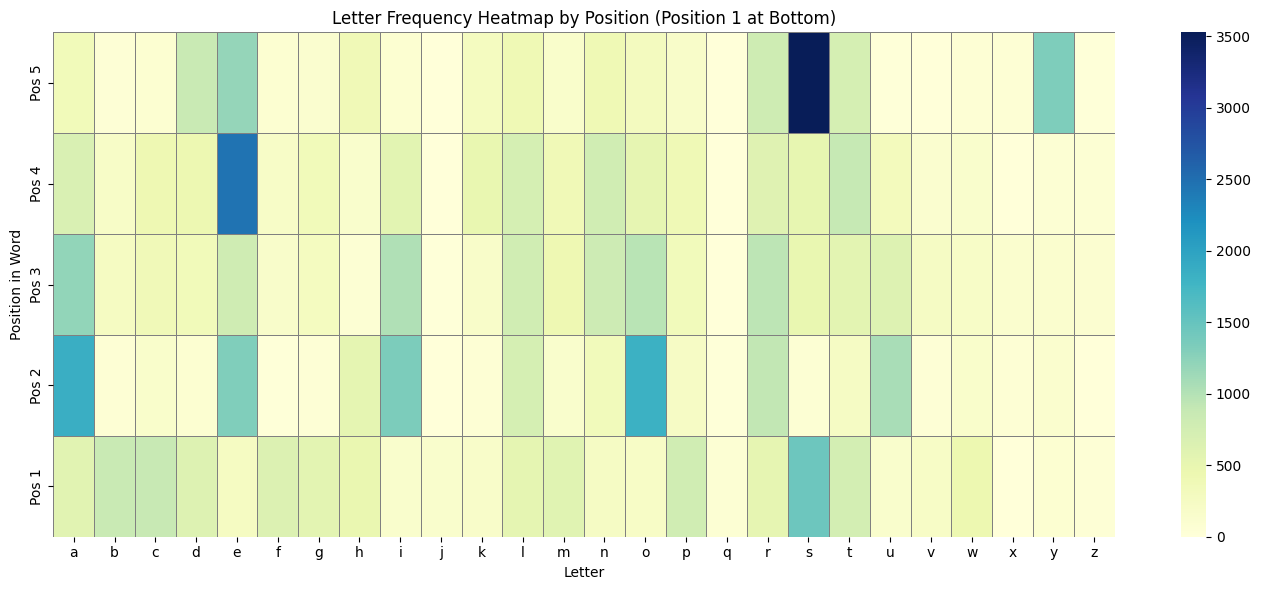

In [27]:
#just flipping it so that the first position is at the bottom and the last one at the top.
heatmap_data_flipped = heatmap_data[::-1]
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data_flipped,
            xticklabels=list(letters),
            yticklabels=['Pos 5', 'Pos 4', 'Pos 3', 'Pos 2', 'Pos 1'],  # flipped labels
            cmap='YlGnBu',
            linewidths=0.5,
            linecolor='gray',
            annot=False)

plt.title('Letter Frequency Heatmap by Position (Position 1 at Bottom)')
plt.xlabel('Letter')
plt.ylabel('Position in Word')
plt.tight_layout()
plt.show()

In [28]:
total_freq = heatmap_data.sum(axis=0)
sorted_indices = np.argsort(-total_freq)
sorted_letters = [letters[i] for i in sorted_indices]
sorted_heatmap_data = heatmap_data[:, sorted_indices]
sorted_heatmap_data = sorted_heatmap_data[::-1]

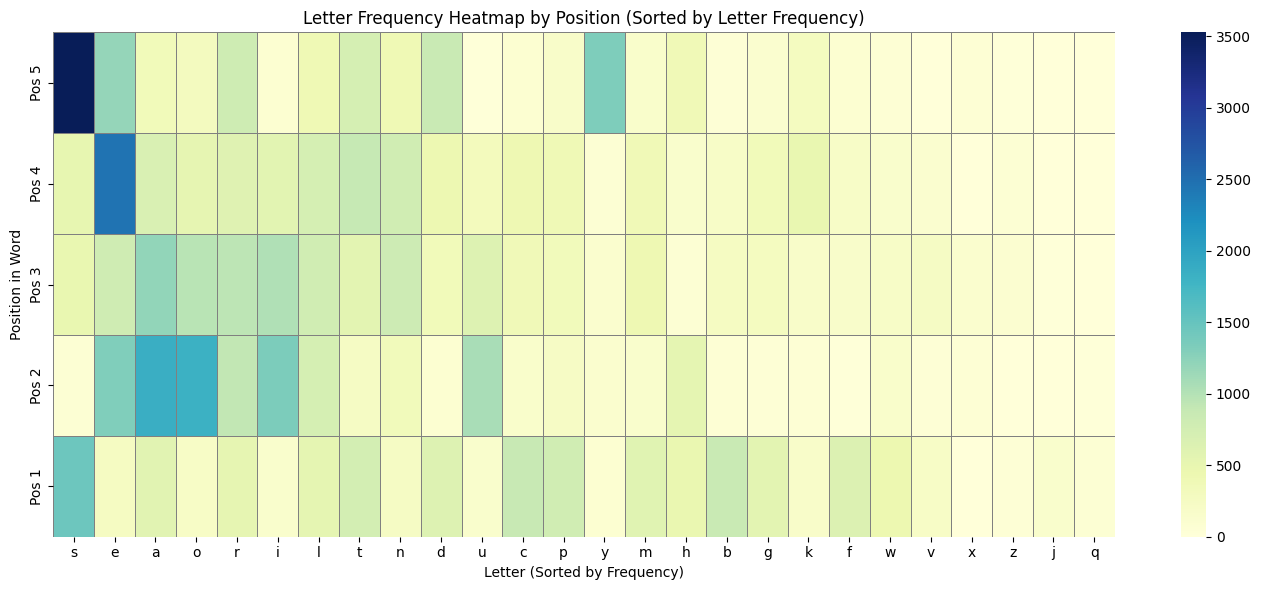

In [29]:
plt.figure(figsize=(14, 6))
sns.heatmap(sorted_heatmap_data,
            xticklabels=sorted_letters,
            yticklabels=['Pos 5', 'Pos 4', 'Pos 3', 'Pos 2', 'Pos 1'],
            cmap='YlGnBu',
            linewidths=0.5,
            linecolor='gray',
            annot=False)

plt.title('Letter Frequency Heatmap by Position (Sorted by Letter Frequency)')
plt.xlabel('Letter (Sorted by Frequency)')
plt.ylabel('Position in Word')
plt.tight_layout()
plt.show()

Taking a note that any further improvement possible would be just on the lines of best opening position for a specific letter, we can actually end it here, and leave to decision of the position for the letter to the intellect of the one solving the game, as we will be soon building an end to end wordle bot to solve the game itself. BaBye;)
